In [3]:
import IPython
import pandas as pd
import numpy as np
from matplotlib import pyplot
from IPython.core.display import display

In [5]:
def load_data(path, headers):
    """
    Load dataset.

    Parameters
    ----------
    path : String
        The path of the dataset

    header : string
        The columns names.
    
    """
    data = pd.read_csv(path, names = headers,na_values=["?"])
    # Total number of records
    n_records = data.shape[0]
    # Print the results
    print ('Total number of records: {}'.format(n_records))
    print('Total number of fatures: {}'.format(len(data.columns)))
    return data

In [6]:
# Describe data and visualize distributions
def exp_analysis(data, describe = True, vizualize = True):
    """
    Describe data and visualize distributions.

    Parameters
    ----------
    data_path : String
        Holds the path of the dataset.
    
    describe : Boolean
            Allows the execution or not of the describe function.
    
    vizualize : Boolean
            Allows the execution or not of the describe function.

    """
    %matplotlib inline
    
    # Exploratory analysis
    if describe:
        display(data.describe())
    
    # Scatter plot 
    if vizualize:
        pd.plotting.scatter_matrix(data, alpha = 0.6, figsize = (30,30));

In [8]:
# Data Load & Pre-processing
from sklearn import preprocessing
import re
# Dataset path
path = 'Traffic.csv' 


# Header names
headers = ['Node','Utilised Bandwith Rate', 'Packet Drop Rate', 'Full_Bandwidth','Average_Delay_Time_Per_Sec',
           'Percentage_Of_Lost_Packet_Rate','Percentage_Of_Lost_Byte_Rate','Packet Received  Rate','Used_Bandwidth','Lost_Bandwidth'
           ,'Packet Size_Byte','Packet_Transmitted','Packet_Received','Packet_lost','Transmitted_Byte','Received_Byte',
          '10-Run-AVG-Drop-Rate','10-Run-AVG-Bandwith-Use','10-Run-Delay','Node Status','Flood Status','Class']

# Load dataset
data = load_data(path, headers)

# Select features
data = data[['Node','Utilised Bandwith Rate','Packet Drop Rate','Full_Bandwidth','Percentage_Of_Lost_Packet_Rate','Percentage_Of_Lost_Byte_Rate','Packet Received  Rate','Used_Bandwidth','Lost_Bandwidth','Packet Size_Byte','Packet_Received','Packet_lost','Transmitted_Byte','Flood Status','Class']]

display(data.head(10))

Total number of records: 1075
Total number of fatures: 22


,Node,Utilised Bandwith Rate,Packet Drop Rate,Full_Bandwidth,Percentage_Of_Lost_Packet_Rate,Percentage_Of_Lost_Byte_Rate,Packet Received Rate,Used_Bandwidth,Lost_Bandwidth,Packet Size_Byte,Packet_Received,Packet_lost,Transmitted_Byte,Flood Status,Class
0,3,0.822038,0.190381,1000,19.031487,19.038129,0.809619,822.037500,177.962500,1440,73128,17196.0,130066560,0.023455,'NB-No Block'
1,9,0.275513,0.729111,100,72.889036,72.911141,0.270889,27.551250,72.448750,1440,2451,6598.0,13029120,0.460725,Block
2,3,0.923707,0.090383,900,9.035834,9.038339,0.909617,831.336000,68.664000,1440,73930,7346.0,117037440,0.000000,'No Block'
3,9,0.368775,0.637710,100,63.737843,63.770999,0.362290,36.877500,63.122500,1440,3278,5770.0,13029120,0.439255,Block
4,3,0.905217,0.108670,800,10.864208,10.866977,0.891330,724.173750,75.826250,1440,64379,7849.0,104008320,0.000000,'No Block'
5,9,0.514687,0.494142,100,49.392131,49.414235,0.505858,51.468750,48.531250,1440,4577,4471.0,13029120,0.291742,'NB-No Block'
6,3,0.912327,0.102633,700,10.252196,10.263258,0.897367,638.628775,61.371225,1440,56789,6495.0,91128960,0.000000,'No Block'
7,9,0.565425,0.444076,100,44.385500,44.407604,0.555924,56.542500,43.457500,1440,5030,4018.0,13029120,0.122299,'NB-No Block'
8,9,0.928000,0.086126,900,8.610168,8.612629,0.913874,835.200000,64.800000,1440,74276,7000.0,117037440,0.000000,'No Block'
9,9,0.551250,0.458002,100,45.778073,45.800177,0.541998,55.125000,44.875000,1440,4904,4144.0,13029120,0.120317,'NB-No Block'


In [9]:
# Transform to binary problem.
data['Class'] = data['Class'].str.replace('\'', '')
data['Class'] = data['Class'].replace('Block','Flooding')
data['Class'] = data['Class'].replace('NB-No Block','Legitimate')
data['Class'] = data['Class'].replace('No Block','Legitimate')
data['Class'] = data['Class'].replace('NB-Wait','Legitimate')

display(data.head(10))

,Node,Utilised Bandwith Rate,Packet Drop Rate,Full_Bandwidth,Percentage_Of_Lost_Packet_Rate,Percentage_Of_Lost_Byte_Rate,Packet Received Rate,Used_Bandwidth,Lost_Bandwidth,Packet Size_Byte,Packet_Received,Packet_lost,Transmitted_Byte,Flood Status,Class
0,3,0.822038,0.190381,1000,19.031487,19.038129,0.809619,822.037500,177.962500,1440,73128,17196.0,130066560,0.023455,Legitimate
1,9,0.275513,0.729111,100,72.889036,72.911141,0.270889,27.551250,72.448750,1440,2451,6598.0,13029120,0.460725,Flooding
2,3,0.923707,0.090383,900,9.035834,9.038339,0.909617,831.336000,68.664000,1440,73930,7346.0,117037440,0.000000,Legitimate
3,9,0.368775,0.637710,100,63.737843,63.770999,0.362290,36.877500,63.122500,1440,3278,5770.0,13029120,0.439255,Flooding
4,3,0.905217,0.108670,800,10.864208,10.866977,0.891330,724.173750,75.826250,1440,64379,7849.0,104008320,0.000000,Legitimate
5,9,0.514687,0.494142,100,49.392131,49.414235,0.505858,51.468750,48.531250,1440,4577,4471.0,13029120,0.291742,Legitimate
6,3,0.912327,0.102633,700,10.252196,10.263258,0.897367,638.628775,61.371225,1440,56789,6495.0,91128960,0.000000,Legitimate
7,9,0.565425,0.444076,100,44.385500,44.407604,0.555924,56.542500,43.457500,1440,5030,4018.0,13029120,0.122299,Legitimate
8,9,0.928000,0.086126,900,8.610168,8.612629,0.913874,835.200000,64.800000,1440,74276,7000.0,117037440,0.000000,Legitimate
9,9,0.551250,0.458002,100,45.778073,45.800177,0.541998,55.125000,44.875000,1440,4904,4144.0,13029120,0.120317,Legitimate


In [10]:
# Class percentage
data.Class.value_counts(normalize=True)

Legitimate    0.888372
Flooding      0.111628
Name: Class, dtype: float64

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer
# Check for missing values
print('Missing Values')
display(data.isnull().sum())

Missing Values


Node                               0
Utilised Bandwith Rate             0
Packet Drop Rate                   0
Full_Bandwidth                     0
Percentage_Of_Lost_Packet_Rate     0
Percentage_Of_Lost_Byte_Rate       0
Packet Received  Rate              0
Used_Bandwidth                     0
Lost_Bandwidth                     0
Packet Size_Byte                   0
Packet_Received                    0
Packet_lost                       15
Transmitted_Byte                   0
Flood Status                       0
Class                              0
dtype: int64

In [13]:
# Taking care of missing values
data['Packet_lost'].fillna((data['Packet_lost'].median()), inplace=True)

In [15]:
# Remove categorical variables in order to visualize the distributions
data_viz = data.drop(['Class'], axis = 1)

In [16]:
# Data description
exp_analysis(data_viz, True, False)

,Node,Utilised Bandwith Rate,Packet Drop Rate,Full_Bandwidth,Percentage_Of_Lost_Packet_Rate,Percentage_Of_Lost_Byte_Rate,Packet Received Rate,Used_Bandwidth,Lost_Bandwidth,Packet Size_Byte,Packet_Received,Packet_lost,Transmitted_Byte,Flood Status
count,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.000000,1075.0,1075.000000,1075.000000,1.075000e+03,1075.000000
mean,6.013953,0.597921,0.411362,540.465116,41.161526,41.192107,0.588073,340.782202,199.682914,1440.0,30593.474419,18539.337209,7.030884e+07,0.131936
std,3.001364,0.186569,0.183356,289.142068,18.352775,18.377690,0.183779,232.136717,140.983649,0.0,20706.957909,12763.828416,3.759512e+07,0.145644
min,3.000000,0.235638,0.086126,100.000000,8.610168,8.612629,0.232061,27.551250,34.165000,1440.0,2451.000000,3913.000000,1.302912e+07,0.000000
25%,3.000000,0.446906,0.247537,300.000000,24.748201,24.753735,0.433279,138.408750,81.197500,1440.0,12491.000000,8029.000000,3.901248e+07,0.023049
50%,9.000000,0.577238,0.437988,500.000000,43.796035,43.798804,0.562012,291.588750,159.510000,1440.0,26847.000000,14943.500000,6.507072e+07,0.079331
75%,9.000000,0.764550,0.556585,800.000000,56.667699,56.672125,0.752463,515.182500,279.272500,1440.0,46588.000000,25902.000000,1.040083e+08,0.230538
max,9.000000,0.928000,0.767939,1000.000000,76.791427,76.793887,0.913874,867.037500,687.926250,1440.0,77131.000000,62415.000000,1.300666e+08,0.566739


/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 1440.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 1440.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 1440.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


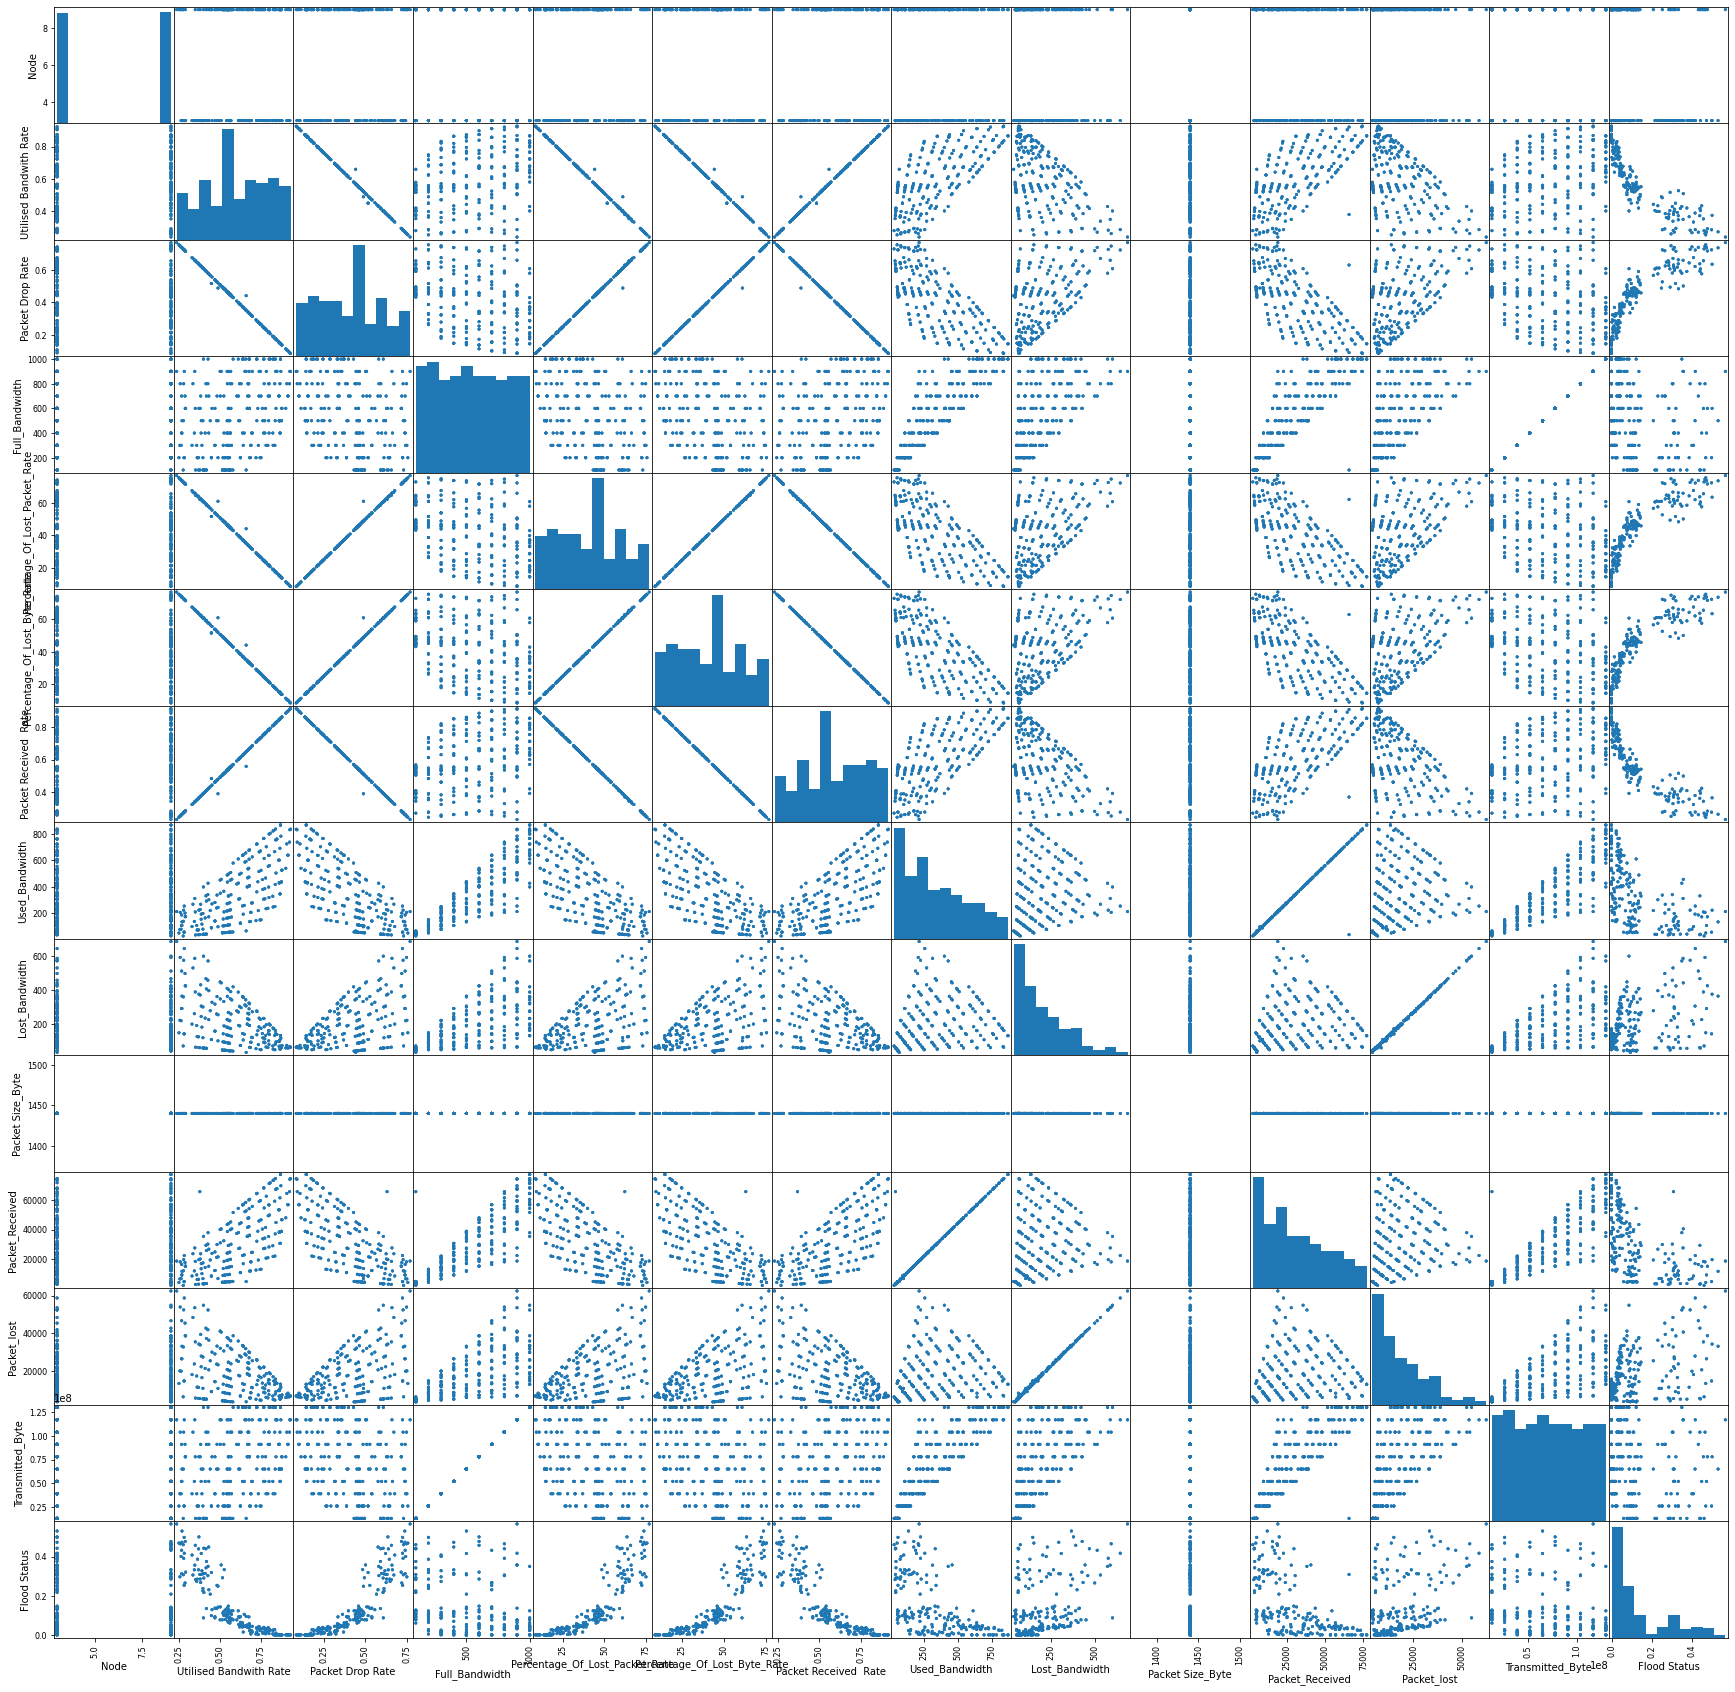

In [17]:
# Data visualization
exp_analysis(data_viz, False, True)

In [11]:
# Log-transform the skewed features
skewed = ['Packet_lost','Packet_Received','Lost_Bandwidth','Used_Bandwidth','Flood Status']
data[skewed] = data[skewed].apply(lambda x: np.log(x + 1))

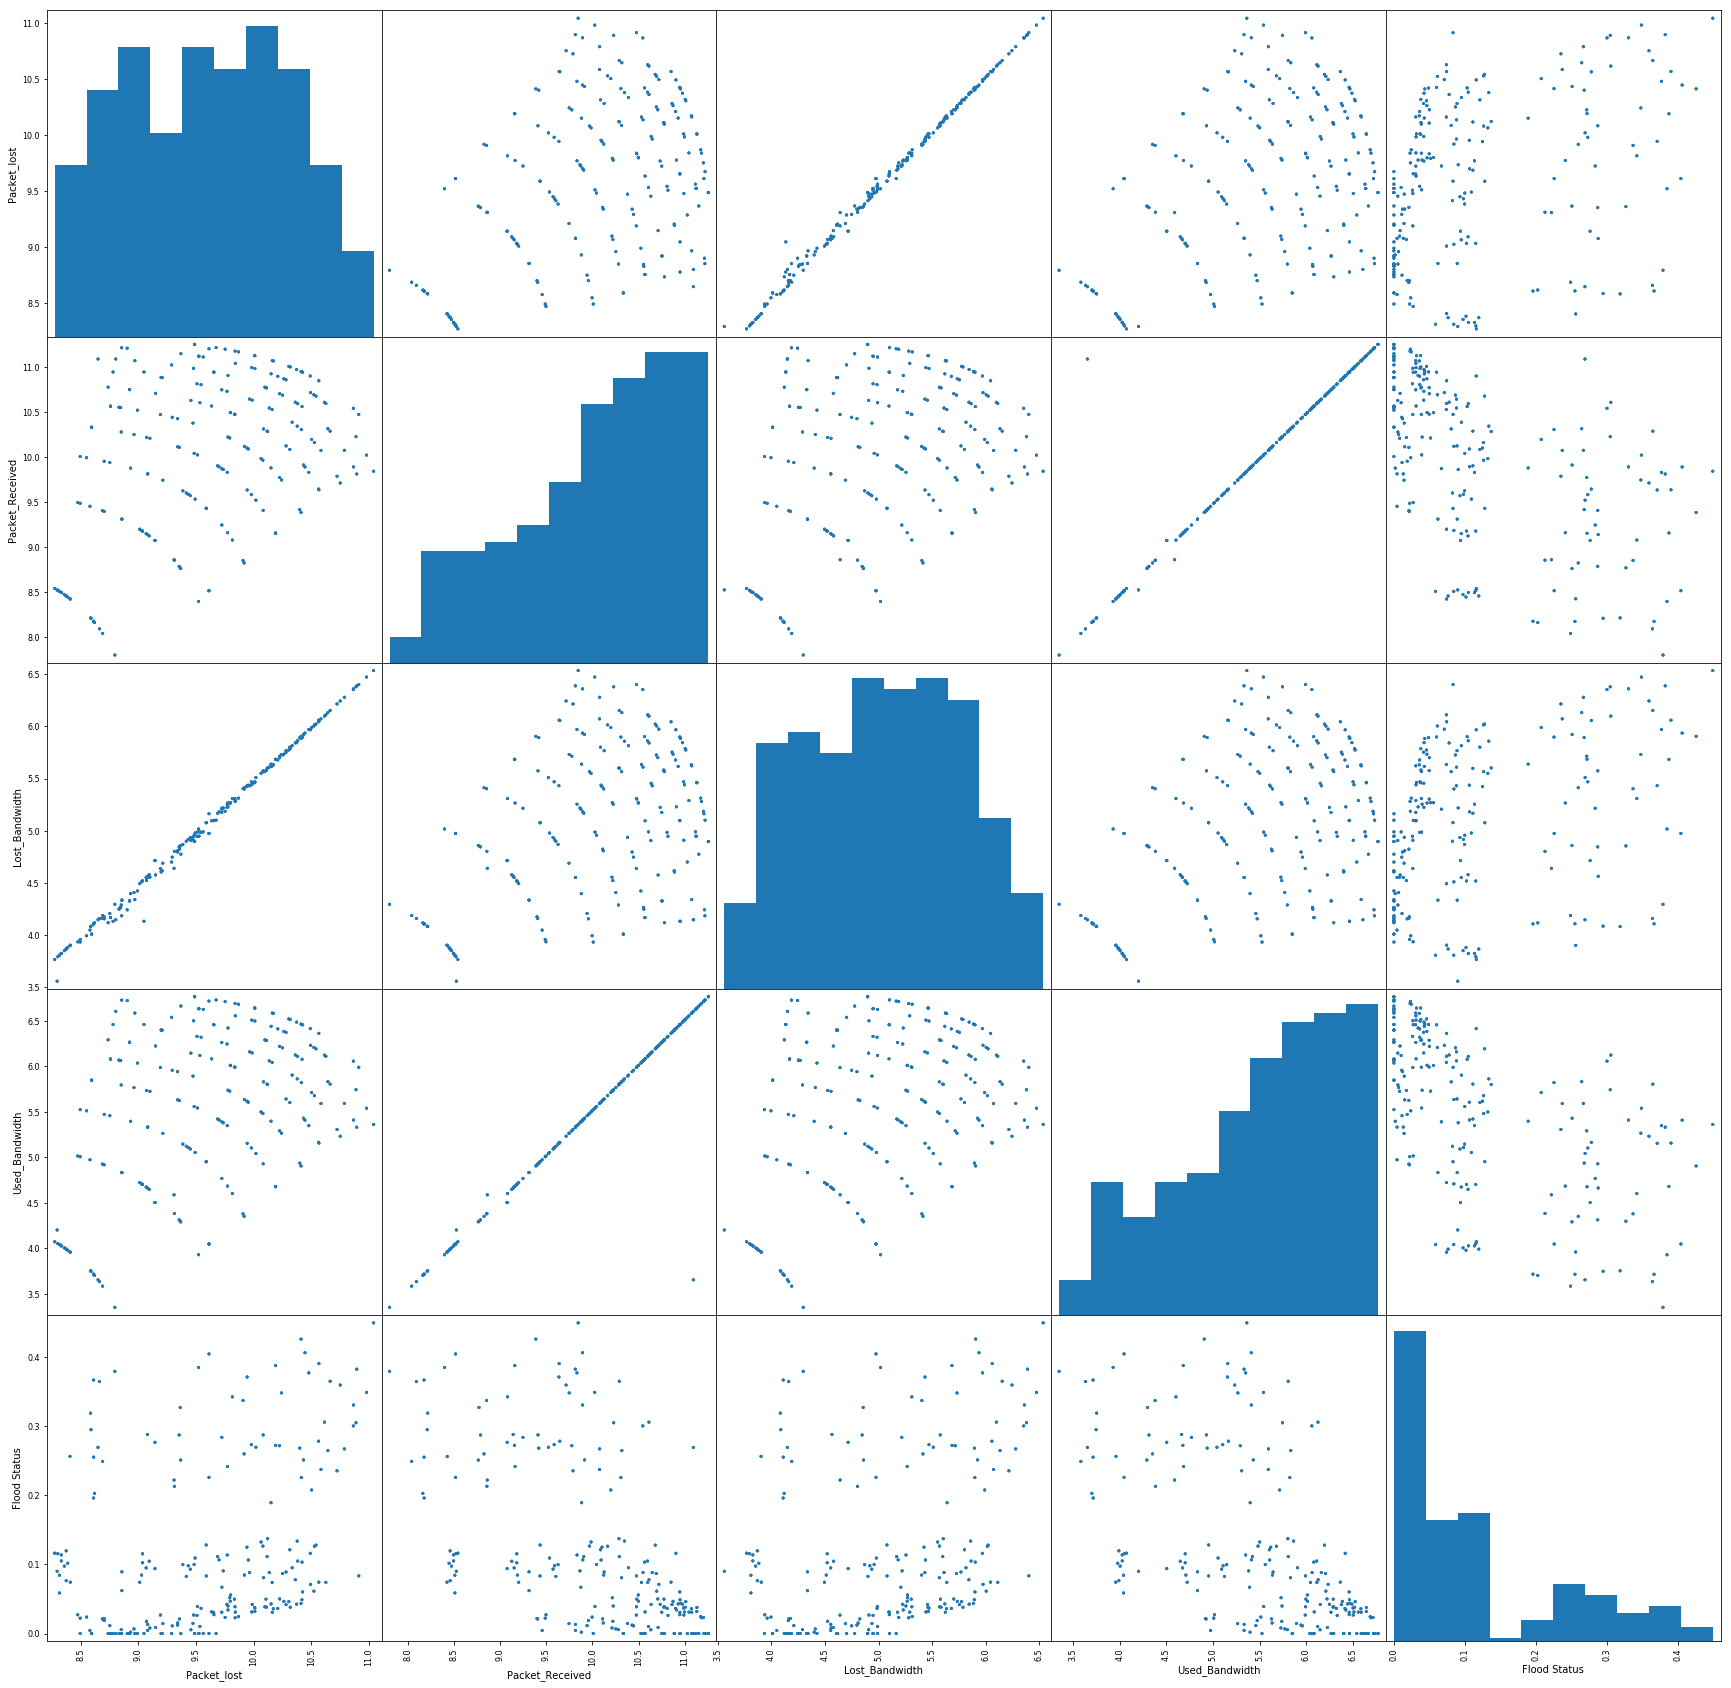

In [29]:
# Visualize Distributions after Log-Transformation
exp_analysis(data[skewed], False, True)

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Drop unecessary columns
data_temp = data.drop(['Node', 'Class'],axis = 1)

# Get important column names
cols_temp_numerical = data_temp.columns

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

data[cols_temp_numerical] = scaler.fit_transform(data[cols_temp_numerical])

# Show an example of a record with scaling applied
display(data.head(n = 5))

,Node,Utilised Bandwith Rate,Packet Drop Rate,Full_Bandwidth,Percentage_Of_Lost_Packet_Rate,Percentage_Of_Lost_Byte_Rate,Packet Received Rate,Used_Bandwidth,Lost_Bandwidth,Packet Size_Byte,Packet_Received,Packet_lost,Transmitted_Byte,Flood Status,Class
0,3,0.846956,0.152908,1.000000,0.152847,0.152909,0.847092,0.946396,0.219954,0.0,0.946398,0.227052,1.000000,0.041386,Legitimate
1,9,0.057593,0.943052,0.000000,0.942764,0.943053,0.056948,0.000000,0.058559,0.0,0.000000,0.045896,0.000000,0.812940,Flooding
2,3,0.993799,0.006244,0.888889,0.006243,0.006244,0.993756,0.957472,0.052770,0.0,0.957137,0.058682,0.888676,0.000000,Legitimate
3,9,0.192294,0.808996,0.000000,0.808546,0.808996,0.191004,0.011109,0.044294,0.0,0.011074,0.031743,0.000000,0.775057,Flooding
4,3,0.967094,0.033065,0.777778,0.033060,0.033064,0.966935,0.829820,0.063725,0.0,0.829245,0.067280,0.777351,0.000000,Legitimate


In [20]:
# Split features and Target Variable
y_df = data['Class']
X_df = data.drop('Class', axis = 1)

In [21]:
# Feature categorical encoding 
X_df = pd.get_dummies(X_df, drop_first = True) # k-1 columns stayed in the features final, in order to tackle multi-colinearity problem
display(X_df.head())

,Node,Utilised Bandwith Rate,Packet Drop Rate,Full_Bandwidth,Percentage_Of_Lost_Packet_Rate,Percentage_Of_Lost_Byte_Rate,Packet Received Rate,Used_Bandwidth,Lost_Bandwidth,Packet Size_Byte,Packet_Received,Packet_lost,Transmitted_Byte,Flood Status
0,3,0.846956,0.152908,1.000000,0.152847,0.152909,0.847092,0.946396,0.219954,0.0,0.946398,0.227052,1.000000,0.041386
1,9,0.057593,0.943052,0.000000,0.942764,0.943053,0.056948,0.000000,0.058559,0.0,0.000000,0.045896,0.000000,0.812940
2,3,0.993799,0.006244,0.888889,0.006243,0.006244,0.993756,0.957472,0.052770,0.0,0.957137,0.058682,0.888676,0.000000
3,9,0.192294,0.808996,0.000000,0.808546,0.808996,0.191004,0.011109,0.044294,0.0,0.011074,0.031743,0.000000,0.775057
4,3,0.967094,0.033065,0.777778,0.033060,0.033064,0.966935,0.829820,0.063725,0.0,0.829245,0.067280,0.777351,0.000000


In [22]:
# Feature - Target split
features = X_df.values
target = y_df.values

In [23]:
# Target variable label encoding
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(target)
y = le.transform(target)

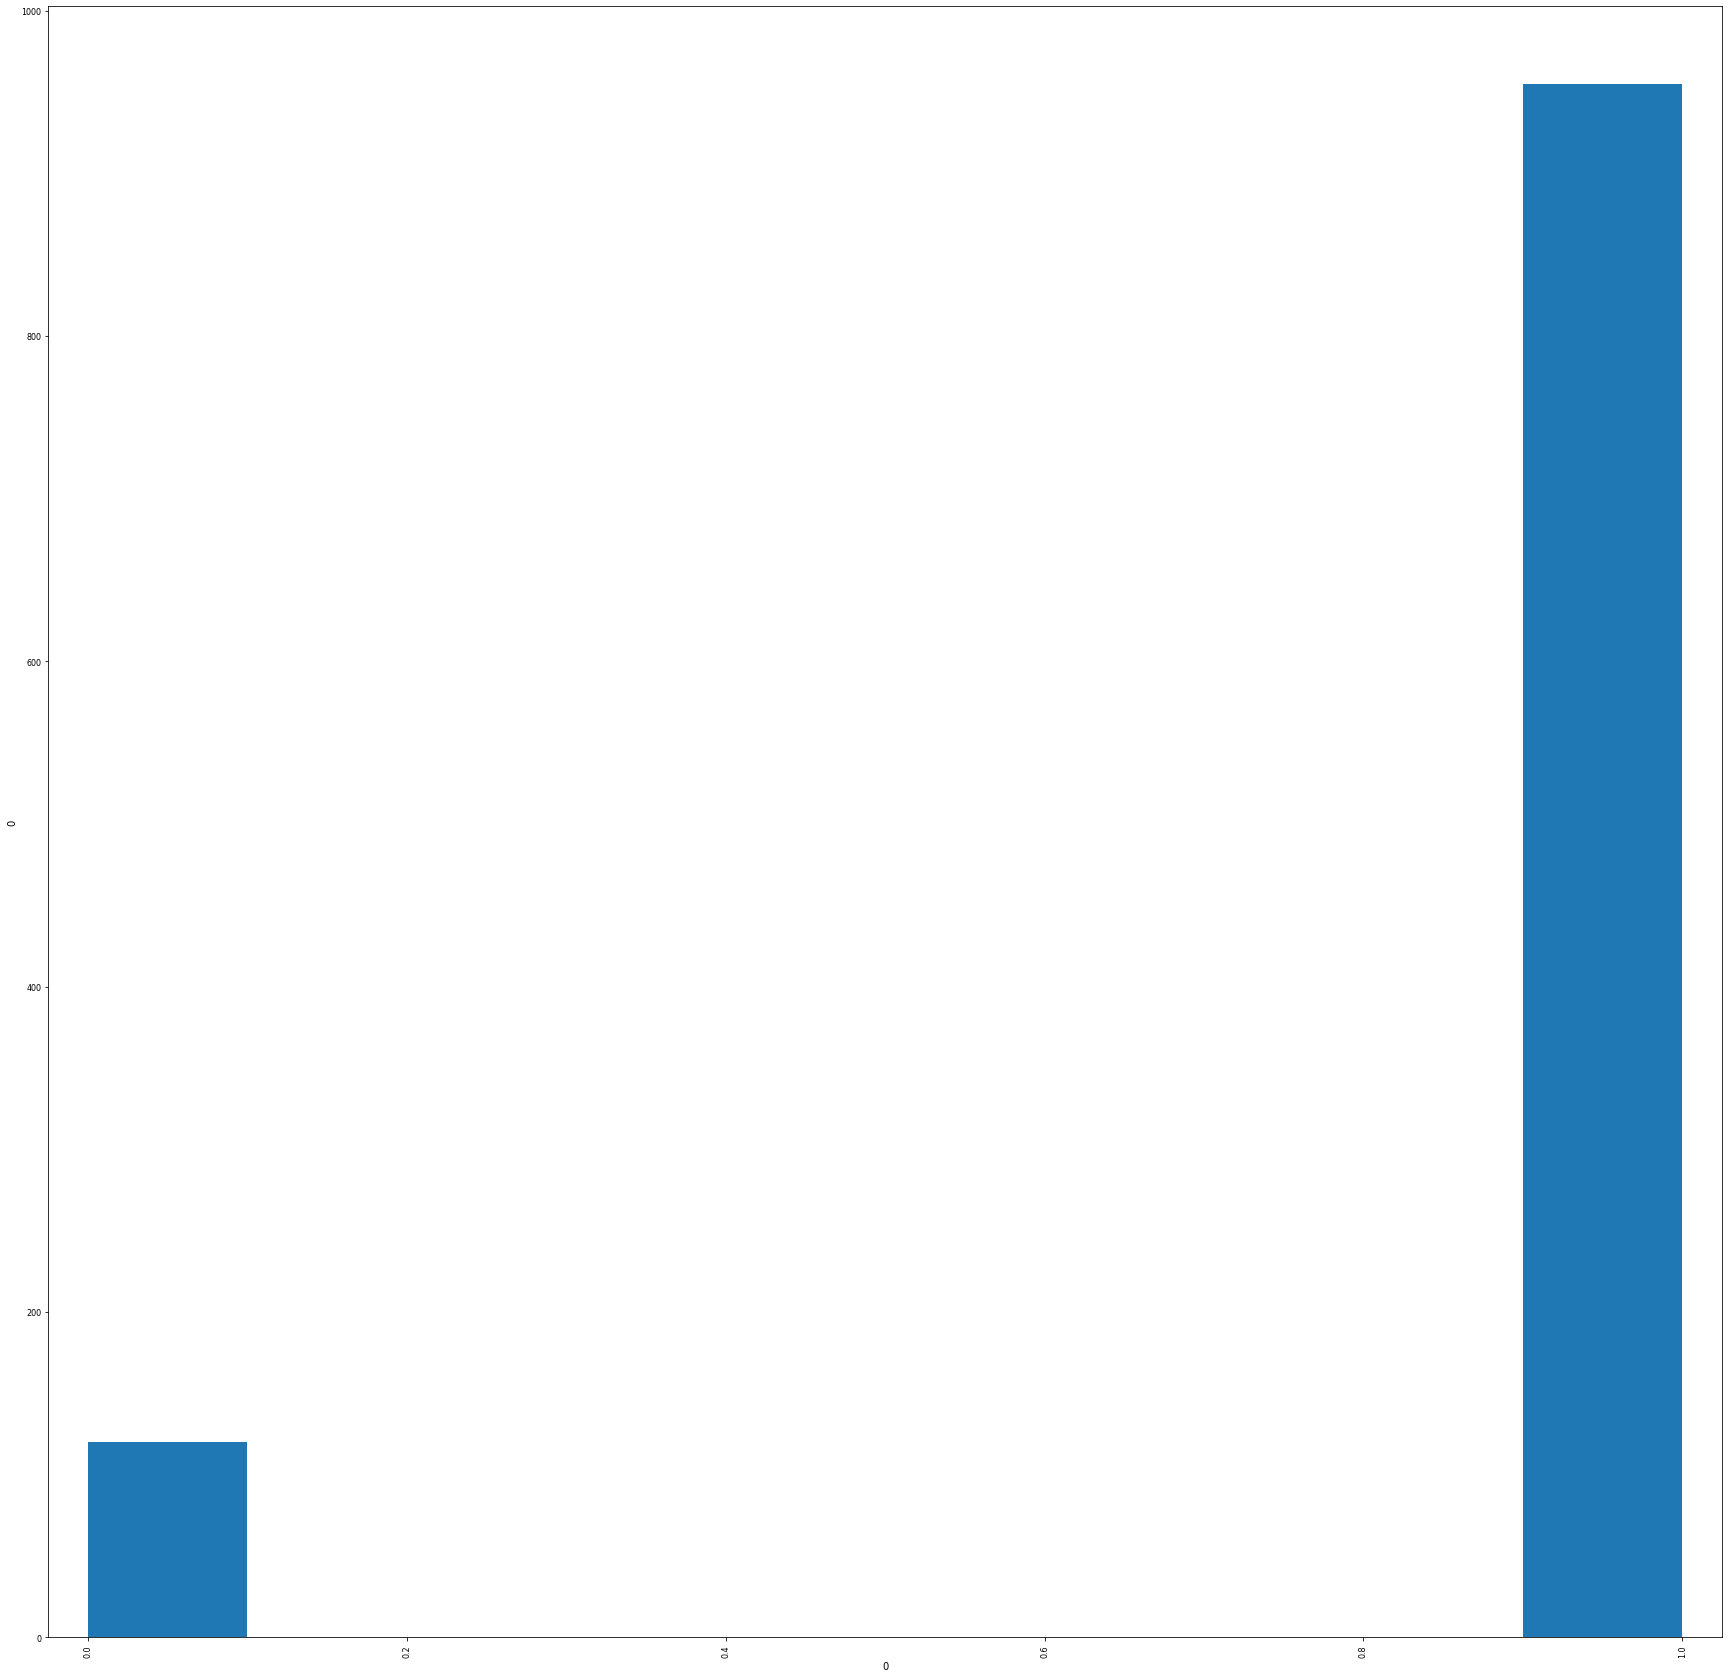

In [24]:
# Visualize Target Class distributions
exp_analysis(pd.DataFrame(y), False, True)

In [26]:
# Feature Selection
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 4)
fit = rfe.fit(features, y)
print("Num Features: %d" ,fit.n_features_)
print("Selected Features: %s", fit.support_)
print("Feature Ranking: %s",fit.ranking_)

Num Features: %d 4
Selected Features: %s [False False  True False  True  True False False False False False False
 False  True]
Feature Ranking: %s [10  3  1  7  1  1  4  9  2 11  6  5  8  1]


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [30]:
# Shuffle and Split Data
# Import train_test_split
from sklearn.model_selection import train_test_split

def train_test(features, target):
    """
    Splits the dataset into train-test sets.

    Parameters
    ----------
    features : array
        Holds the predictors.
    features : array
        Holds the predicted value.
    """
    # Split features and target variables into training and testins sets
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, shuffle = True)

    # Display the results of the split
    print( "Training set: {} samples".format(X_train.shape[0]))
    print("Testing samples: {} samples".format(X_test.shape[0]))
    
    return [X_train, y_train, X_test, y_test]

In [33]:
 cl_params = {
    "SVC": {
        "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
        "gamma": np.arange(0.0, 1.1, 0.1),
        "C" : [1.0,1.2,2.6,2.7,2.8],
        "degree" :[3,4,5,6],
        "tol" :[0.001, 1e-1,1e-2,1e-3,1e-4, 1e-5]
    },
    "KN": {
        'n_neighbors': range(2, 50),
        'weights' : ['uniform', 'distance'],
         'algorithm' : ['ball_tree','kd_tree','brute'],
         'leaf_size' : np.arange(30, 90, 5),
         'p' : np.arange(1, 20, 1),
         'metric' : ['euclidean','manhattan','chebyshev','minkowski'] 
    },
    "DT": {
        "min_samples_split": range(3, 20,),
        "criterion" :["gini", "entropy"],
        "max_features" : ["log2"]
        
    },
    
    "LR": {
        "solver": ['newton-cg', 'sag','saga','lbfgs'],
        "penalty" : [ "l2"],
        "dual" : [False],
        "C" :[2.6,2.7,2.8,2.9,3.0],
        "fit_intercept" : [True, False],
        "class_weight" : ["balanced"],
        "intercept_scaling" : [0.0001, 0.001],
        "max_iter" : [100,150],
        "tol" : [0.001, 1e-1,1e-2,1e-3],
        "verbose" : [0,1,2,3,4],
        "warm_start" : [True, False] 
    },
    "RF": {
        #'max_depth': range(2, 100, 10), # requires to much time
        'max_features': ['auto', 'sqrt', 'log2'],
        'n_estimators': range(10, 201, 10),       
        'criterion' : ['gini','entropy'],
        'bootstrap' : [True],
        'oob_score' : [False, True]
    },
    "AdaBoost": {
        "n_estimators": range(2, 200)
    },
    "SGD": {
        'loss' : ["log","modified_huber"],
        'penalty' : ["none","l2","l1","elasticnet"],
        'fit_intercept' : [True,False]
    },
    "BgC": {
        "n_estimators": range(2, 200),
        'max_samples' : [0.05, 0.1, 0.2, 0.5],
    },
    "mlp": {
        "activation": ['identity', 'logistic', 'tanh', 'relu'],
        'solver ' : ['lbfgs', 'sgd', 'adam'],
        'max_iter' : [50,100,150],
        "tol" : [0.001, 1e-1,1e-2,1e-3]
    } 
}
    

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier

#Initialize the  models
abc = AdaBoostClassifier(algorithm="SAMME.R")
bc = BaggingClassifier(base_estimator=LogisticRegression(),random_state=7)
sgd = GradientBoostingClassifier( random_state=7)
rfc = RandomForestClassifier()
svc = SVC(random_state = 7)
lrc = LogisticRegression()
nbc = GaussianNB()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
mlp = MLPClassifier()
    
clfs = {
    'LR': lrc,
    'SVC': svc,
    'KN': knc,
    'DT': dtc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'SGD' : sgd,
    'NB' :  nbc,
    'MLP' : mlp
}

In [62]:
import time


def param_tune(clf,X_train, y_train, cv = 10):
    """
    Hyper-parameter optimization.

    Parameters
    ----------
    estimator : object
        Holds the model.
    params : dictionary
        Holds the grid.
    X_train : array
        Holds the features.
    y_train : array
        Holds the predicted value.
    """
    grid_search = GridSearchCV(clfs[clf], cl_params[clf], cv=cv, n_jobs=-1)
    start = time.time()
    grid_search.fit(X_train, y_train)
        
    print("[INFO] randomized search took {:.2f} seconds".format(time.time() - start))
    print("[INFO] randomized search best parameters: {}".format(grid_search.best_params_))
    return grid_search

In [63]:
# Save models in pickle and JSON files
def save_model_pickle(model):
    filename = str(clfs[model].__class__.__name__) + '.pkl'
    print(filename)
    joblib.dump(clfs[model],filename) 

In [64]:
import json  
import numpy as np

# A method for saving object data to JSON file
def logistic_regression_to_json(lrmodel, file=None):
    if file is not None:
        serialize = lambda x: json.dump(x, file)
    else:
        serialize = json.dumps
    data = {}
    data['init_params'] = lrmodel.get_params()
    data['model_params'] = mp = {}
    for p in ('coef_', 'intercept_','classes_', 'n_iter_'):
        mp[p] = getattr(lrmodel, p).tolist()
    print(serialize(data) )
    json_txt = json.dumps(serialize(data), indent=4)
    with open('mylogreg.json', 'w') as file:
            file.write(json_txt)

   # return serialize(data)  

In [65]:
# Evaluate perfomance
def performance_eval(f_beta, acc):       
    # Fbeta score print
    print ("fbeta_score {}".format(f_beta))
    # Accuracy score print
    print ("accuracy_score {}".format(acc))

In [67]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import random

# Visualize performance on test set
def performance_viz(y_test, y_pred):
    # Visualize ROC Curve
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [68]:
# Visualize training and validation curves
def performance_train_val_viz(model, X_train, y_train, scorer):    
    # Create CV training and test scores for various training set sizes
    train_sizes, train_scores, test_scores = learning_curve(model, 
                                                            X_train, 
                                                            y_train,
                                                            # Number of folds in cross-validation
                                                            cv=10,
                                                            # Evaluation metric
                                                            scoring=scorer,
                                                            # Use all computer cores
                                                            n_jobs=-1, 
                                                            # 50 different sizes of the training set
                                                            train_sizes=np.linspace(0.01, 1.0, 50))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [69]:
# Model Training & Hyper Parameter Tunning & Performance Evaluation
# Construction of hyper parameters grid to tune
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import accuracy_score, fbeta_score
import datetime
from time import time
from sklearn.model_selection import GridSearchCV, train_test_split
import joblib
from sklearn.model_selection import validation_curve,learning_curve
import json
import numpy as np

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    # Make an fbeta_score scoring object using make_scorer()
    scorer = make_scorer(fbeta_score, beta=0.5)
    
    # Initialize a dictionary to save the results.
    results = {}
    #results_cros_val = []

    start = time.time() # Get start time
    
    # Fit the learner to the training data using 
    #grid_search = GridSearchCV(clfs[learner], cl_params[learner], cv=10, scoring=scorer, verbose=10, n_jobs=-1)
    #grid_search.fit(X_train, y_train)
    model = clfs[learner].fit(X_train, y_train)
    end = time.time() # Get end time

    # Print Cros-validation results
    #     results_cros_val.append(cv_results)
    #clf_name_pr  = clf.__class__.__name__

    
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the X_test set,
    # then get predictions on the X_train set using .predict()
    start = time.time() # Get start time
    #predictions_test = grid_search.predict(X_test)
    #predictions_train = grid_search.predict(X_train)
    predictions_test = model.predict(X_test)
    predictions_train = model.predict(X_train)
    end = time.time() # Get end time
    
    
    
    # Calculate the total prediction time
    results['pred_time'] = end - start

    # Compute accuracy on  training samples 
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on  training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train, predictions_train,beta = 0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test,beta = 0.5)
    
    print("="*30)
    # Print performance results on train set
    print('Results on training set:')
    performance_eval(results['f_train'],results['acc_train'])
    
    # Print performance results on test set
    print('Results on test set:')
    performance_eval(results['f_test'],results['acc_test'])
    
    # Visualize learning (train, validation) curves
    performance_train_val_viz(model, X_train, y_train, scorer)
    
    # Visualize results on test set
    performance_viz(y_test,predictions_test)
    
    # Save model
    print('Saving the model...')
    save_model(learner)
    if (model.__class__.__name__ == 'LogisticRegression'):
        attr = model.__dict__
        atb_clf = model.__dict__
        logistic_regression_to_json(model)
        #print(attr)
    print("="*30)
    # Return the results
    return results


Training set: 752 samples
Testing samples: 323 samples
LR
Results on training set:
fbeta_score 0.9790819291109819
accuracy_score 0.976063829787234
Results on test set:
fbeta_score 0.9538357094365241
accuracy_score 0.9473684210526315


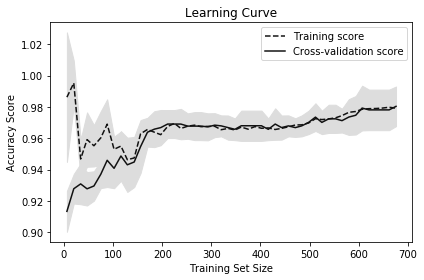

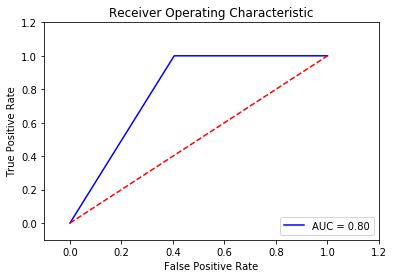

Saving the model...
LogisticRegression.pkl
{"init_params": {"C": 1.0, "class_weight": null, "dual": false, "fit_intercept": true, "intercept_scaling": 1, "max_iter": 100, "multi_class": "ovr", "n_jobs": 1, "penalty": "l2", "random_state": null, "solver": "liblinear", "tol": 0.0001, "verbose": 0, "warm_start": false}, "model_params": {"coef_": [[0.0019481433547073265, 2.026394178630106, 0.4356579697728857, -0.9537185981593702, 0.49179501367029405, 0.5191166154372725, 1.9909019918901403, 1.066382514794761, -0.0548912991273125, 0.0, 1.4018507466090255, -0.17128000864613196, -0.9501187823825176, -6.084611445229253]], "intercept_": [2.510165806692225], "classes_": [0, 1], "n_iter_": [11]}}
SVC
Results on training set:
fbeta_score 0.9412265758091994
accuracy_score 0.9202127659574468
Results on test set:
fbeta_score 0.9153998678122934
accuracy_score 0.891640866873065


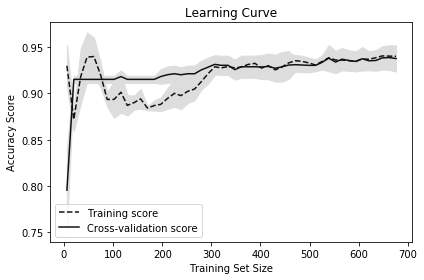

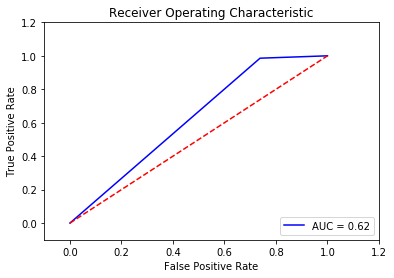

Saving the model...
SVC.pkl
KN
Results on training set:
fbeta_score 0.9976317347542926
accuracy_score 0.9973404255319149
Results on test set:
fbeta_score 0.991531404375441
accuracy_score 0.9907120743034056


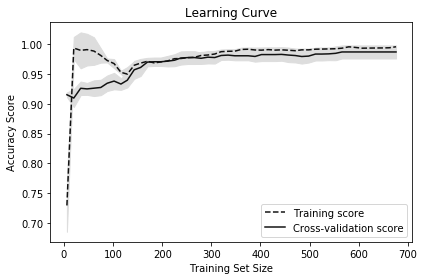

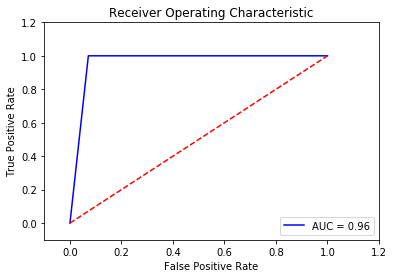

Saving the model...
KNeighborsClassifier.pkl
DT
Results on training set:
fbeta_score 1.0
accuracy_score 1.0
Results on test set:
fbeta_score 1.0
accuracy_score 1.0


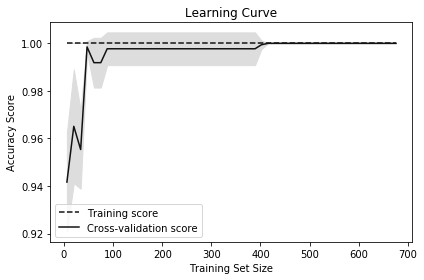

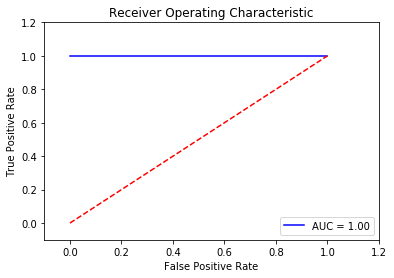

Saving the model...
DecisionTreeClassifier.pkl
RF
Results on training set:
fbeta_score 1.0
accuracy_score 1.0
Results on test set:
fbeta_score 1.0
accuracy_score 1.0


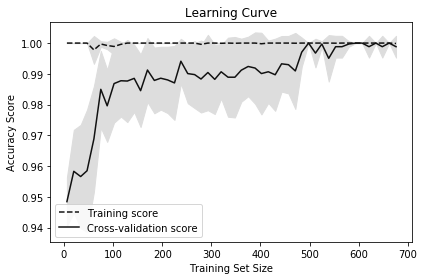

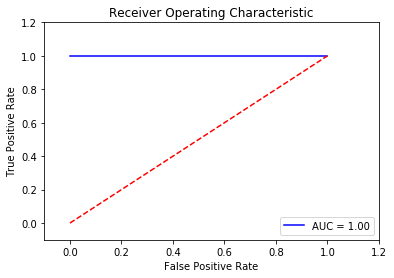

Saving the model...
RandomForestClassifier.pkl
AdaBoost
Results on training set:
fbeta_score 1.0
accuracy_score 1.0
Results on test set:
fbeta_score 1.0
accuracy_score 1.0


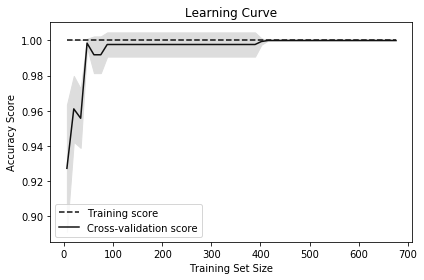

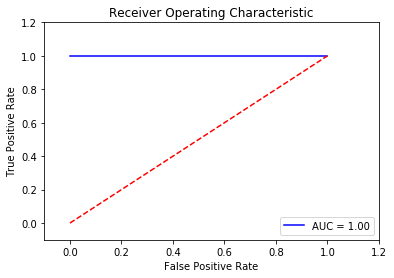

Saving the model...
AdaBoostClassifier.pkl
BgC
Results on training set:
fbeta_score 0.9813628421665695
accuracy_score 0.9787234042553191
Results on test set:
fbeta_score 0.9616700889801505
accuracy_score 0.9566563467492261


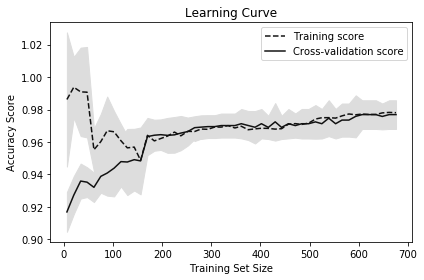

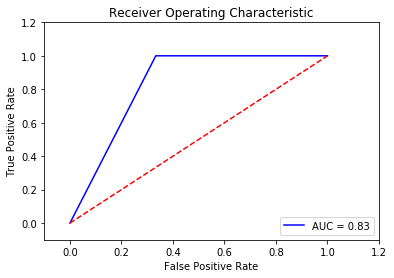

Saving the model...
BaggingClassifier.pkl
SGD
Results on training set:
fbeta_score 1.0
accuracy_score 1.0
Results on test set:
fbeta_score 1.0
accuracy_score 1.0


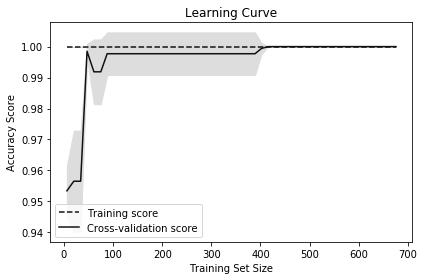

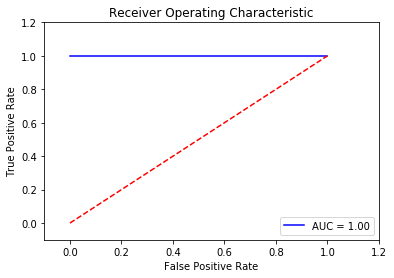

Saving the model...
GradientBoostingClassifier.pkl
NB
Results on training set:
fbeta_score 0.9657218193803561
accuracy_score 0.8776595744680851
Results on test set:
fbeta_score 0.980317940953823
accuracy_score 0.9287925696594427


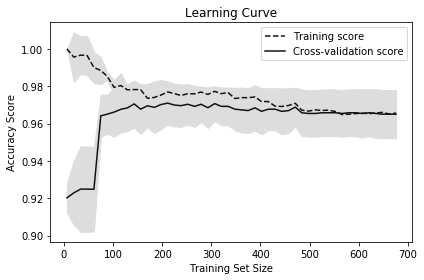

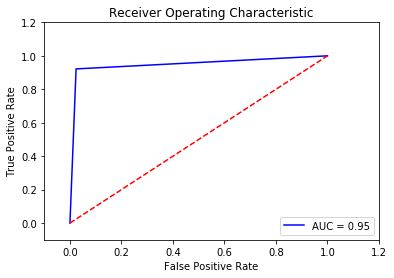

Saving the model...
GaussianNB.pkl
MLP


C:\Users\billis\Anaconda3\Lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Results on training set:
fbeta_score 0.9905937683715461
accuracy_score 0.9893617021276596
Results on test set:
fbeta_score 0.9804605722260991
accuracy_score 0.978328173374613


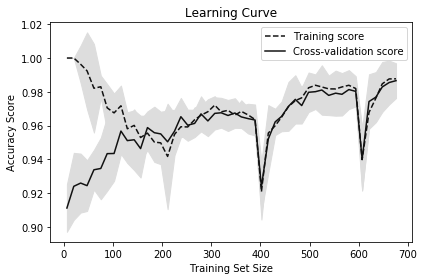

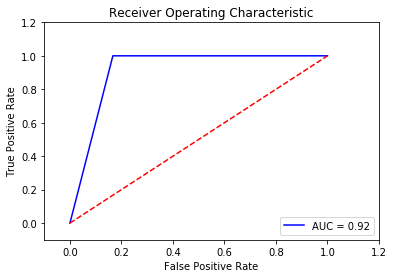

Saving the model...
MLPClassifier.pkl


In [170]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
import numpy as np 
import time

X_train, y_train, X_test, y_test = train_test(features, y)

for k, v in clfs.items():
    print(k)
    trained_cl = train_predict(k, X_train, y_train, X_test, y_test)


In [173]:
def load_model(model_path):
    '''
    inputs:
       - molde_path: the path of the saved model (pickle). 
       Example call: clf = joblib.load('path_of_the_pickle_file.pkl') 
                    model_predictions = clf.predict(X_test)
                    accuracy_score(y_test, model_predictions)
                    fbeta_score(y_test, model_predictions)
    '''
    clf = joblib.load(model_path) 
    return clf

In [196]:
# Load model
loaded_model = load_model('traffic_classification/pick-file/.pkl')

# Print error score
result = loaded_model.score(X_test, y_test)

# Make predictions
predictions = loaded_model.predict(X_test)

# Evaluate predictions accuracy score
results_acc = accuracy_score(y_test, predictions)

# Evaluate predictions fbeta score
results_f_beta = fbeta_score(y_test, predictions, beta = 0.5)

print('Accuracy score: {}'.format(results_acc))
print('fbeta score: {}'.format(results_f_beta))

Accuracy score: 0.9473684210526315
fbeta score: 0.9538357094365241
